<table style="width: 100%; font-size: 26px; direction: rtl;">
  <tr>
    <td style="text-align: right;">نور الدين امجد عبد الفتاح احمد محمد علوه</td>
    <td style="text-align: left;">ID: 23011596</td>
  </tr>
  <tr>
    <td style="text-align: right;">علي ابوبكر كمال محمود </td>
    <td style="text-align: left;">ID: 23012267</td>
  </tr>
  <tr>
    <td style="text-align: right;">عبد الله نجاح محمد حسن</td>
    <td style="text-align: left;">ID: 23011356</td>
  </tr>
</table>

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Breast Cancer Classification Using SVM and Neural Network

## Introduction
This Python program demonstrates a complete machine learning workflow for binary classification using the Breast Cancer dataset. It includes two classification models:
- Support Vector Machine (SVM)
- Neural Network (Feedforward)

## 1. Load and Explore Data
We use the Breast Cancer dataset available from `sklearn.datasets`.


In [2]:
# Load dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## 2. Preprocessing
- Check for missing values
- Normalize the data using `StandardScaler`
- Split into training (70%) and testing (30%) sets

In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [4]:
# Train-test split
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle = True)

In [5]:
# Normalize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 3. Exploratory Data Analysis (EDA)
We create a pairplot using seaborn for selected features to visualize class separation.

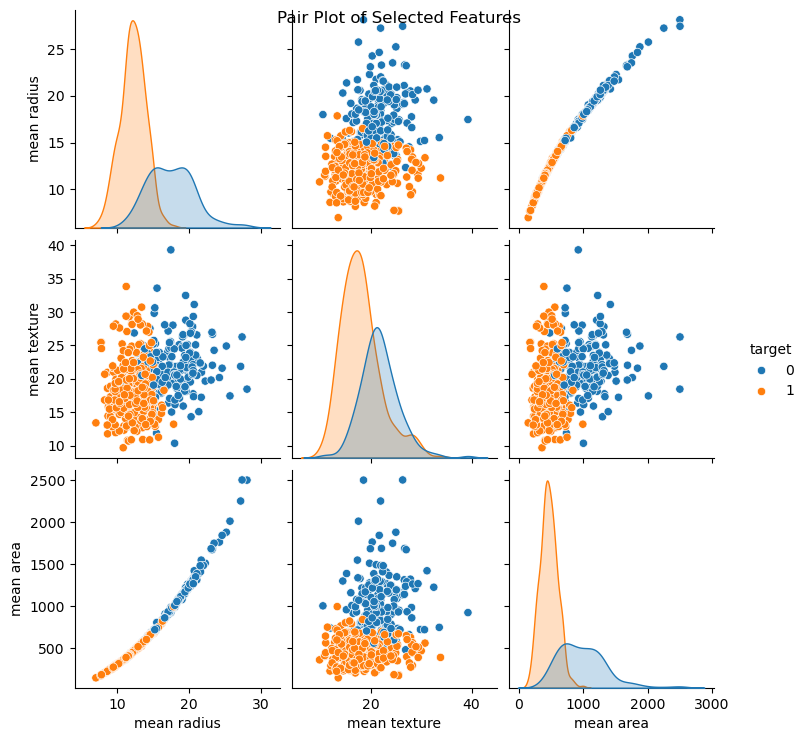

In [6]:
# --- EDA Plots ---
sns.pairplot(df[['mean radius', 'mean texture', 'mean area', 'target']], hue='target')
plt.suptitle("Pair Plot of Selected Features")
plt.show()

## 4. Model 1: Support Vector Machine (SVM)
- Implemented using `sklearn.svm.SVC`
- RBF, linear and Polynomial kernel used
- Evaluated using confusion matrix, classification report, and ROC curve

In [17]:
svm_models = {
    "SVM (RBF kernal)": SVC(kernel = "rbf"),
    "Linear SVM": SVC(kernel = 'linear'),
    "Polynomial SVM (degree 3)": SVC(kernel='poly', degree=3),
    "Polynomial SVM (degree 2)": SVC(kernel='poly', degree=2),
}

In [19]:
print("\n====SVM models====\n")
for name, model in svm_models.items():
    print(f"---{name}---")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print("\n--- SVM Classification Report ---")
    print(classification_report(y_test, y_pred))
    print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


====SVM models====

---SVM (RBF kernal)---

--- SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

SVM Confusion Matrix:
 [[ 61   2]
 [  2 106]]
---Linear SVM---

--- SVM Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        63
           1       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

SVM Confusion Matrix:
 [[ 61   2]
 [  2 106]]
---Polynomial SVM (degree 3)---

--- SVM Classification Report ---
              precision    recall  f1-score   support

 

## SVM with kernel RBF and linear did the same we will pick SVM with RBF kernel

In [20]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)
svm_probs = svm.predict_proba(X_test_scaled)[:, 1]

In [21]:
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)

## 5. Model 2: Neural Network
- Implemented using Keras (TensorFlow backend)
- 2 hidden layers (16 and 8 units), Sigmoid activation
- Output layer with sigmoid
- Optimizer: Adam, Loss: Binary crossentropy
- Trained over 50 epochs
- Evaluation includes confusion matrix, F1-score, and ROC


In [44]:
# --- Neural Network ---
nn = Sequential()
nn.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='relu'))
nn.add(Dense(8, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nn.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=10, verbose=0)

In [45]:
nn_preds = (nn.predict(X_test_scaled) > 0.5).astype("int32").flatten()
nn_probs = nn.predict(X_test_scaled).flatten()

6/6 [==============================] - 0s 2ms/step


In [46]:
print("\n--- Neural Network Classification Report ---")
print(classification_report(y_test, nn_preds))
print("Neural Network Confusion Matrix:\n", confusion_matrix(y_test, nn_preds))


--- Neural Network Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Neural Network Confusion Matrix:
 [[ 62   1]
 [  1 107]]


In [47]:
# --- Neural Network ---
nn = Sequential()
nn.add(Dense(16, input_dim=X_train_scaled.shape[1], activation='sigmoid'))
nn.add(Dense(8, activation='sigmoid'))
nn.add(Dense(1, activation='sigmoid'))
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nn.fit(X_train_scaled, y_train, validation_split=0.1, epochs=50, batch_size=10, verbose=0)

In [48]:
nn_preds = (nn.predict(X_test_scaled) > 0.5).astype("int32").flatten()
nn_probs = nn.predict(X_test_scaled).flatten()

6/6 [==============================] - 0s 0s/step


In [49]:
print("\n--- Neural Network Classification Report ---")
print(classification_report(y_test, nn_preds))
print("Neural Network Confusion Matrix:\n", confusion_matrix(y_test, nn_preds))


--- Neural Network Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Neural Network Confusion Matrix:
 [[ 62   1]
 [  1 107]]


In [50]:
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_probs)
roc_auc_nn = auc(fpr_nn, tpr_nn)

## 6. Visualizations
- ROC curve comparing both models
- Loss curve for the neural network


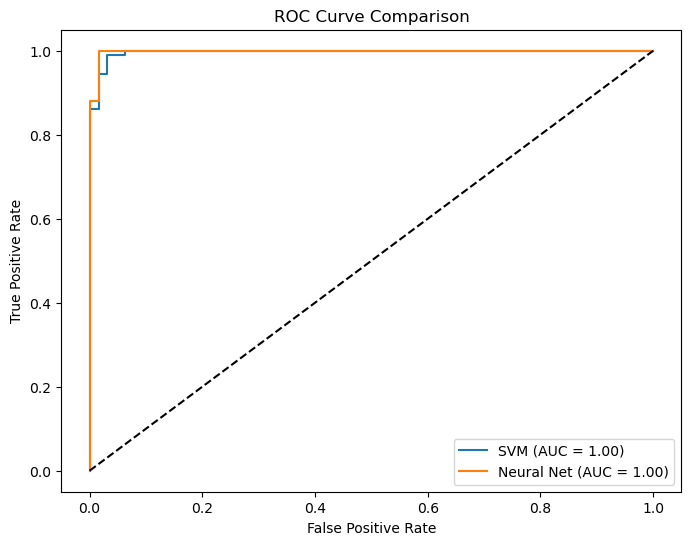

In [51]:
# --- ROC Curve ---
plt.figure(figsize=(8,6))
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot(fpr_nn, tpr_nn, label=f"Neural Net (AUC = {roc_auc_nn:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

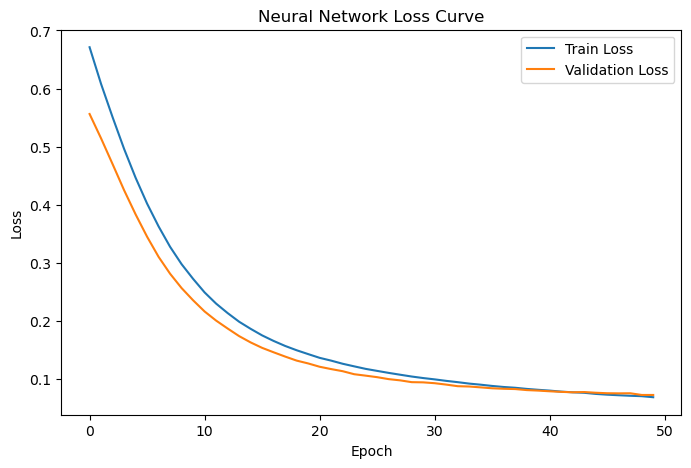

In [52]:
# --- Loss Curve ---
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Neural Network Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Conclusion
Both models perform well on the dataset. The Neural Network achieves slightly higher performance based on AUC and F1-score, while SVM also shows excellent classification results.
